### Imports

In [1]:
import numpy as np
import pandas as pd 
from collections import Counter
import os
import glob
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Read CSV files

In [2]:
profiles = [pd.read_csv(file, index_col=0, low_memory=False) for file in sorted(glob.glob('gmm' + "/*."+'csv'))]
cohorts = [file.split(".")[0] for file in sorted(os.listdir('gmm/'))]


profiles2 = [pd.read_csv(file, index_col=0, low_memory=False) for file in sorted(glob.glob('k_means/' + "/*."+'csv'))]
cohorts2 = [file.split(".")[0] for file in sorted(os.listdir('k_means/'))]


profiles3 = [pd.read_csv(file, index_col=0, low_memory=False) for file in sorted(glob.glob('study_reported/' + "/*."+'csv'))]
cohorts3 = [file.split(".")[0] for file in sorted(os.listdir('study_reported/'))]

In [3]:
# make a dictionary that contains all cohorts as a dataframe
profiles_dfs = dict()
profiles_dfs_km = dict()
profiles_dfs_study_cutoff = dict()


for cohort, dataset in zip(cohorts, profiles):

    cohort_n = cohort.split("_")[-1]
    profiles_dfs[cohort_n] = dataset
    
    
for cohort2, dataset2 in zip(cohorts2, profiles2):

    cohort_n2 = cohort2.split("_")[-1]
    profiles_dfs_km[cohort_n2] = dataset2
    
    
for cohort3, dataset3 in zip(cohorts3, profiles3):

    cohort_n3 = cohort3.split("_")[-1]
    profiles_dfs_study_cutoff[cohort_n3] = dataset3

In [4]:
for i in profiles_dfs['gmm'].index:
    profiles_dfs[i] = profiles_dfs[i].replace({"-": 0})
    profiles_dfs[i] = profiles_dfs[i].astype(int)
    
    profiles_dfs_km[i] = profiles_dfs_km[i].replace({"-": 0})
    profiles_dfs_km[i] = profiles_dfs_km[i].astype(int)
    
for i in profiles_dfs_study_cutoff['cutoff-based'].index:   
    profiles_dfs_study_cutoff[i] = profiles_dfs_study_cutoff[i].replace({"-": 0})
    profiles_dfs_study_cutoff[i] = profiles_dfs_study_cutoff[i].astype(int)

In [7]:
profiles_dfs['ADNI']

,A-T-N-,A-T+N+,A-T-N+,A-T+N-,A+T+N-,A+T-N-,A+T-N+,A+T+N+
CU,126,6,4,0,3,109,1,17
MCI,137,16,1,1,16,237,5,118
AD,12,6,0,1,6,97,6,92
Unknown,0,0,0,0,0,0,0,0


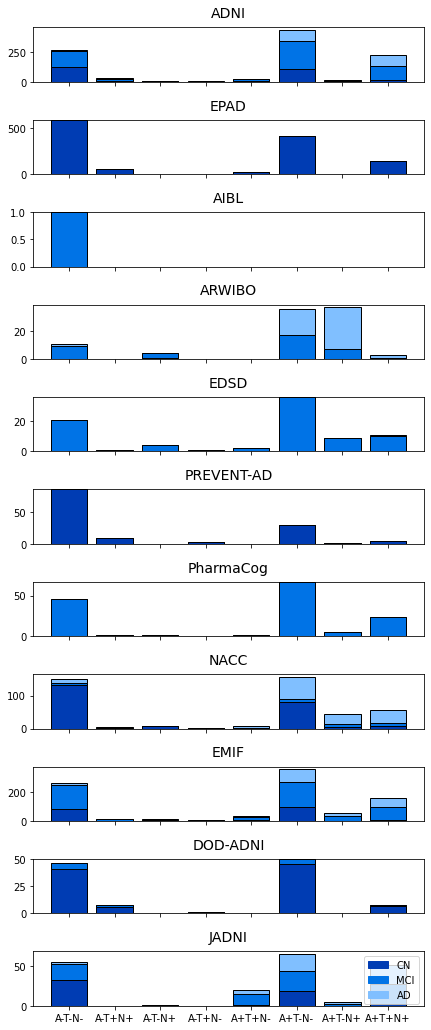

In [5]:
fig, axes = plt.subplots(11, sharex=True, figsize=(7, 18))
fig.subplots_adjust(hspace=0.7)
i=0

x = profiles_dfs['ADNI'].columns.to_list()

for ind in profiles_dfs['gmm'].index:
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    axes[i].bar(x, profiles_dfs[ind].loc['CU'].astype(int).to_numpy(), color='#003cb3', edgecolor='black')
    axes[i].bar(x, profiles_dfs[ind].loc['MCI'].astype(int).to_numpy(), bottom=profiles_dfs[ind].loc['CU'].astype(int).to_numpy(), color='#0073e6', edgecolor='black')
    axes[i].bar(x, profiles_dfs[ind].loc['AD'].astype(int).to_numpy(), bottom=profiles_dfs[ind].loc['CU'].astype(int) + profiles_dfs[ind].loc['MCI'].astype(int).to_numpy(), color='#80bfff', edgecolor='black')

    axes[i].set_title(ind, fontsize=14, pad=10)
    
    # Custom legend 
    patch1 = mpatches.Patch(color='#003cb3', label='CN') 
    patch2 = mpatches.Patch(color='#0073e6', label='MCI') 
    patch3 = mpatches.Patch(color='#80bfff', label='AD')
    axes[10].legend(handles=[patch1, patch2, patch3], loc='upper right')

    i+=1
    
# plt.savefig("stacked_bar_atn_diag_gmm.png", dpi=300, bbox_inches='tight')

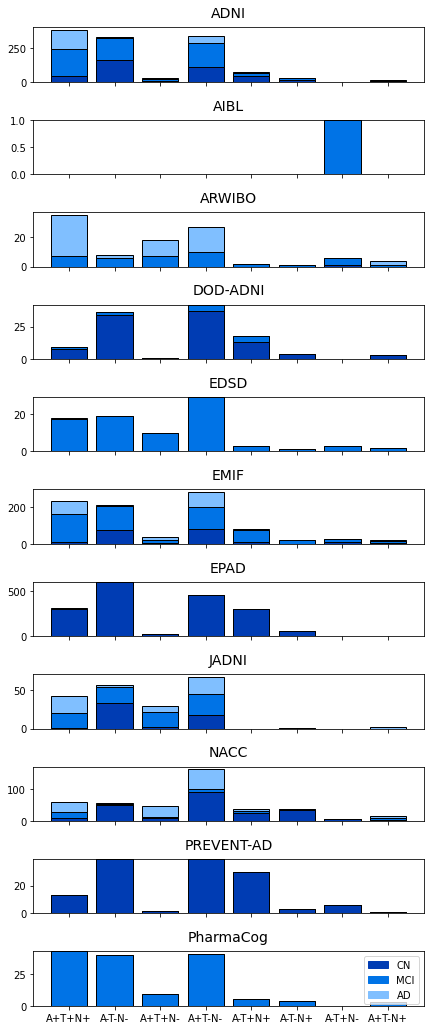

In [6]:
fig, axes = plt.subplots(11, sharex=True, figsize=(7, 18))
fig.subplots_adjust(hspace=0.7)
i=0

x = profiles_dfs['ADNI'].columns.to_list()

for ind in profiles_dfs['gmm'].index:
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    axes[i].bar(x, profiles_dfs_km[ind].loc['CU'].astype(int).to_numpy(), color='#003cb3', edgecolor='black')
    axes[i].bar(x, profiles_dfs_km[ind].loc['MCI'].astype(int).to_numpy(), bottom=profiles_dfs_km[ind].loc['CU'].astype(int).to_numpy(), color='#0073e6', edgecolor='black')
    axes[i].bar(x, profiles_dfs_km[ind].loc['AD'].astype(int).to_numpy(), bottom=profiles_dfs_km[ind].loc['CU'].astype(int) + profiles_dfs_km[ind].loc['MCI'].astype(int).to_numpy(), color='#80bfff', edgecolor='black')
    
    axes[i].set_title(ind, fontsize=14, pad=10)
    
    # Custom legend 
    patch1 = mpatches.Patch(color='#003cb3', label='CN') 
    patch2 = mpatches.Patch(color='#0073e6', label='MCI') 
    patch3 = mpatches.Patch(color='#80bfff', label='AD')
    axes[10].legend(handles=[patch1, patch2, patch3], loc='upper right')

    i+=1
    
plt.savefig("stacked_bar_atn_diag_km.png", dpi=300, bbox_inches='tight')

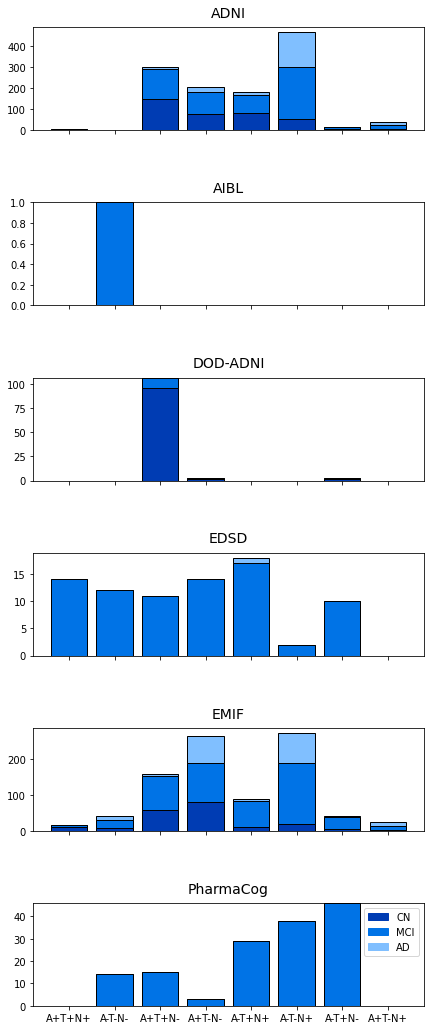

In [7]:
fig, axes = plt.subplots(6, sharex=True, figsize=(7, 18))
fig.subplots_adjust(hspace=0.7)
i=0

x = profiles_dfs['ADNI'].columns.to_list()

for ind in profiles_dfs_study_cutoff['cutoff-based'].index:
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    axes[i].bar(x, profiles_dfs_study_cutoff[ind].loc['CU'].astype(int).to_numpy(), color='#003cb3', edgecolor='black')
    axes[i].bar(x, profiles_dfs_study_cutoff[ind].loc['MCI'].astype(int).to_numpy(), bottom=profiles_dfs_study_cutoff[ind].loc['CU'].astype(int).to_numpy(), color='#0073e6', edgecolor='black')
    axes[i].bar(x, profiles_dfs_study_cutoff[ind].loc['AD'].astype(int).to_numpy(), bottom=profiles_dfs_study_cutoff[ind].loc['CU'].astype(int) + profiles_dfs_study_cutoff[ind].loc['MCI'].astype(int).to_numpy(), color='#80bfff', edgecolor='black')
    
    axes[i].set_title(ind, fontsize=14, pad=10)
    
    # Custom legend 
    patch1 = mpatches.Patch(color='#003cb3', label='CN') 
    patch2 = mpatches.Patch(color='#0073e6', label='MCI') 
    patch3 = mpatches.Patch(color='#80bfff', label='AD')
    axes[5].legend(handles=[patch1, patch2, patch3], loc='upper right')

    i+=1
    
plt.savefig("stacked_bar_atn_diag_study-cutoffs.png", dpi=300, bbox_inches='tight')